In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV file
df = pd.read_csv('prepared_and_cleaned_dataset_2.csv')

In [2]:
df.head()

,customer_id,customer_value,gender,customer_type,age,type_of_travel,class,flight_distance,departure_delay_in_minutes,arrival_delay_in_minutes,...,on_board_service,inflight_service,checkin_service,online_boarding,ease_of_online_booking,baggage_handling,gate_location,departure_arrival_time_convenience,services_rating_score,services_rating_percentage
0,70172,mid,M,loyal,13,personal,eco plus,460,25,18,...,4.0,5.0,4.0,3.0,3.0,4,1.0,4.0,28.0,70.0
1,5047,high,M,disloyal,25,business,business,235,1,6,...,1.0,4.0,1.0,3.0,3.0,3,3.0,2.0,20.0,50.0
2,110028,high,F,loyal,26,business,business,1142,0,0,...,4.0,4.0,4.0,5.0,2.0,4,2.0,2.0,27.0,67.5
3,24026,high,F,loyal,25,business,business,562,11,9,...,2.0,4.0,1.0,2.0,5.0,3,5.0,5.0,27.0,67.5
4,119299,high,M,loyal,61,business,business,214,0,0,...,3.0,3.0,3.0,5.0,3.0,4,3.0,3.0,27.0,67.5


In [3]:
df.dtypes

customer_id                             int64
customer_value                         object
gender                                 object
customer_type                          object
age                                     int64
type_of_travel                         object
class                                  object
flight_distance                         int64
departure_delay_in_minutes              int64
arrival_delay_in_minutes                int64
time_recovered_in_minutes               int64
time_recovery_status                   object
satisfaction                           object
satisfaction_bool                        bool
seat_comfort                          float64
leg_room_service                      float64
food_and_drink                        float64
inflight_entertainment                float64
inflight_wifi_service                 float64
cleanliness                           float64
products_rating_score                 float64
products_rating_percentage        

In [ ]:
'''
Tasks:
- Confirm data quality & segment health
- Identify what drives satisfaction (correlation)
- Identify where customers are unhappy (low ratings %)
- Combine both into Improvement Priority Score
- Rank Top 5 fix-now services per customer segment
- Translate analytics → business actions
'''

In [ ]:
### Verifying Segments & Sample Strengths

In [5]:
# code to get statistical data of high-value customers
high_value_stats = df[df['customer_value'] == 'high'].describe()
high_value_stats

,customer_id,age,flight_distance,departure_delay_in_minutes,arrival_delay_in_minutes,time_recovered_in_minutes,seat_comfort,leg_room_service,food_and_drink,inflight_entertainment,...,on_board_service,inflight_service,checkin_service,online_boarding,ease_of_online_booking,baggage_handling,gate_location,departure_arrival_time_convenience,services_rating_score,services_rating_percentage
count,45588.000000,45588.000000,45588.000000,45588.000000,45588.000000,45588.000000,45588.000000,45477.000000,45566.000000,45578.000000,...,45585.000000,45585.000000,45588.000000,45011.000000,43643.000000,45588.000000,45587.000000,43557.000000,45588.000000,45588.00000
mean,68632.336229,41.541195,1618.250680,4.304773,3.813745,0.491028,3.746293,3.622666,3.323728,3.633288,...,3.654514,3.828650,3.482495,3.747884,3.040831,3.814973,2.981486,3.043828,27.281324,68.20331
std,37578.565849,12.897013,1132.680171,8.531862,7.107770,6.535407,1.199272,1.227802,1.281456,1.240615,...,1.205790,1.119981,1.201934,1.165346,1.372453,1.128759,1.368638,1.397649,5.774548,14.43637
min,1.000000,7.000000,31.000000,0.000000,0.000000,-30.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,17.50000
25%,37390.500000,32.000000,577.000000,0.000000,0.000000,0.000000,3.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,2.000000,2.000000,23.000000,57.50000
50%,71532.500000,42.000000,1509.000000,0.000000,0.000000,0.000000,4.000000,4.000000,3.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000,27.000000,67.50000
75%,100319.500000,51.000000,2488.250000,5.000000,5.000000,1.000000,5.000000,5.000000,4.000000,5.000000,...,5.000000,5.000000,4.000000,5.000000,4.000000,5.000000,4.000000,4.000000,32.000000,80.00000
max,129866.000000,85.000000,4983.000000,60.000000,30.000000,60.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,40.000000,100.00000


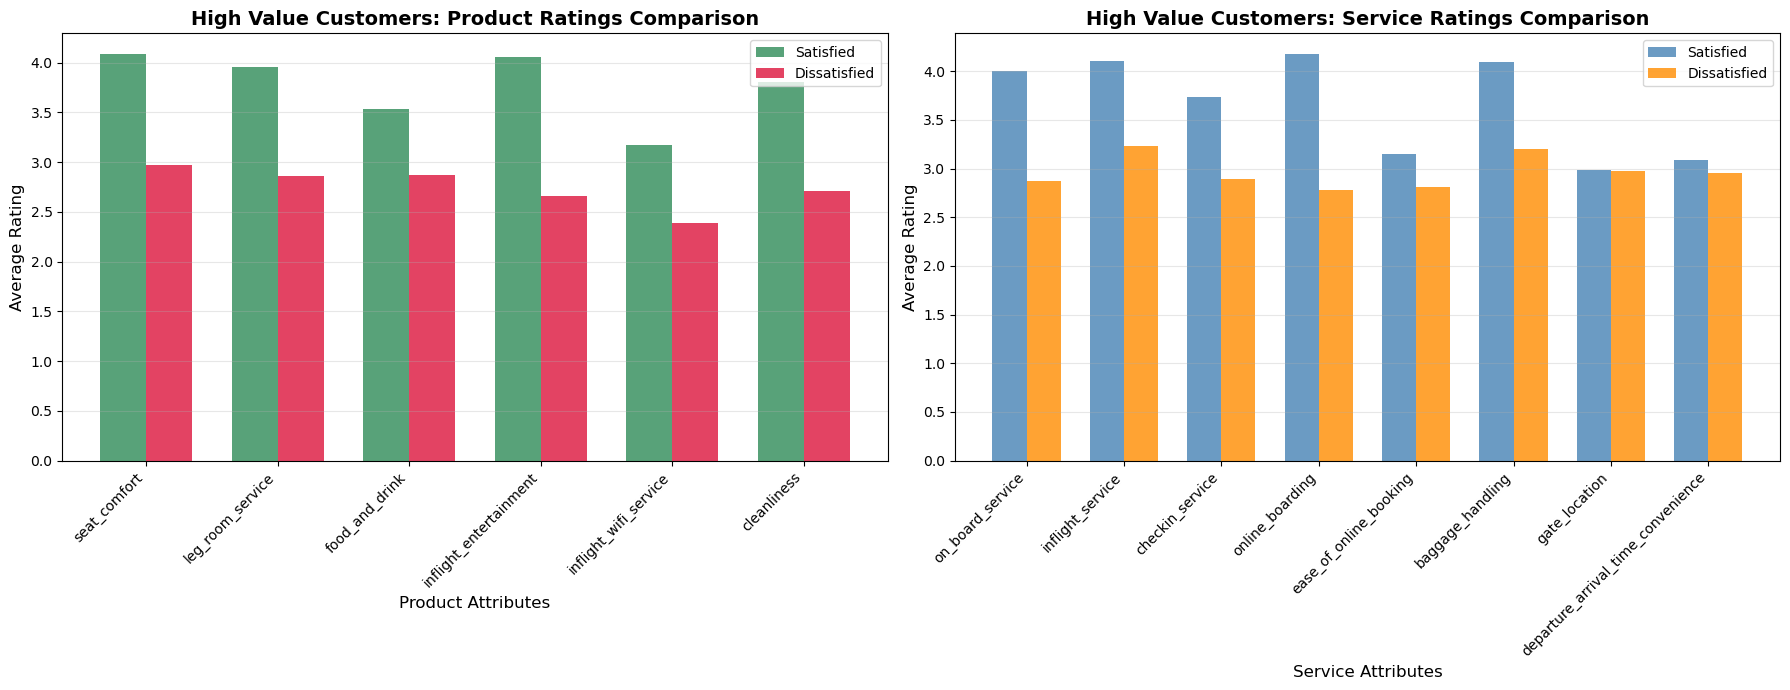

Graph saved as: high_value_clustered_bars.png


In [10]:
# Define product and service columns
product_cols = ['seat_comfort', 'leg_room_service', 'food_and_drink', 
                'inflight_entertainment', 'inflight_wifi_service', 'cleanliness']
service_cols = ['on_board_service', 'inflight_service', 'checkin_service',
                'online_boarding', 'ease_of_online_booking', 'baggage_handling',
                'gate_location', 'departure_arrival_time_convenience']

# For high value customers only
high_value_df = df[df['customer_value'] == 'high']

# Product columns satisfaction rate
product_satisfaction_rates = {}
for col in product_cols:
    satisfied_mean = high_value_df[high_value_df['satisfaction_bool']][col].mean()
    dissatisfied_mean = high_value_df[~high_value_df['satisfaction_bool']][col].mean()
    gap = satisfied_mean - dissatisfied_mean
    product_satisfaction_rates[col] = {'satisfied_avg': satisfied_mean, 
                                       'dissatisfied_avg': dissatisfied_mean, 
                                       'gap': gap}

# Service columns satisfaction rate
service_satisfaction_rates = {}
for col in service_cols:
    satisfied_mean = high_value_df[high_value_df['satisfaction_bool']][col].mean()
    dissatisfied_mean = high_value_df[~high_value_df['satisfaction_bool']][col].mean()
    gap = satisfied_mean - dissatisfied_mean
    service_satisfaction_rates[col] = {'satisfied_avg': satisfied_mean, 
                                       'dissatisfied_avg': dissatisfied_mean, 
                                       'gap': gap}

# Create DataFrames
product_df = pd.DataFrame(product_satisfaction_rates).T.round(2)
service_df = pd.DataFrame(service_satisfaction_rates).T.round(2)

# Create stacked clustered bar graph
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# Product ratings - stacked clustered bar
x = np.arange(len(product_df))
width = 0.35
ax1.bar(x - width/2, product_df['satisfied_avg'], width, label='Satisfied', 
        color='#2E8B57', alpha=0.8)
ax1.bar(x + width/2, product_df['dissatisfied_avg'], width, label='Dissatisfied', 
        color='#DC143C', alpha=0.8)
ax1.set_title('High Value Customers: Product Ratings Comparison', fontsize=14, fontweight='bold')
ax1.set_ylabel('Average Rating', fontsize=12)
ax1.set_xlabel('Product Attributes', fontsize=12)
ax1.set_xticks(x)
ax1.set_xticklabels(product_df.index, rotation=45, ha='right')
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# Service ratings - stacked clustered bar
x = np.arange(len(service_df))
ax2.bar(x - width/2, service_df['satisfied_avg'], width, label='Satisfied', 
        color='#4682B4', alpha=0.8)
ax2.bar(x + width/2, service_df['dissatisfied_avg'], width, label='Dissatisfied', 
        color='#FF8C00', alpha=0.8)
ax2.set_title('High Value Customers: Service Ratings Comparison', fontsize=14, fontweight='bold')
ax2.set_ylabel('Average Rating', fontsize=12)
ax2.set_xlabel('Service Attributes', fontsize=12)
ax2.set_xticks(x)
ax2.set_xticklabels(service_df.index, rotation=45, ha='right')
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('high_value_clustered_bars.png', dpi=300, bbox_inches='tight')
plt.show()
print("Graph saved as: high_value_clustered_bars.png")

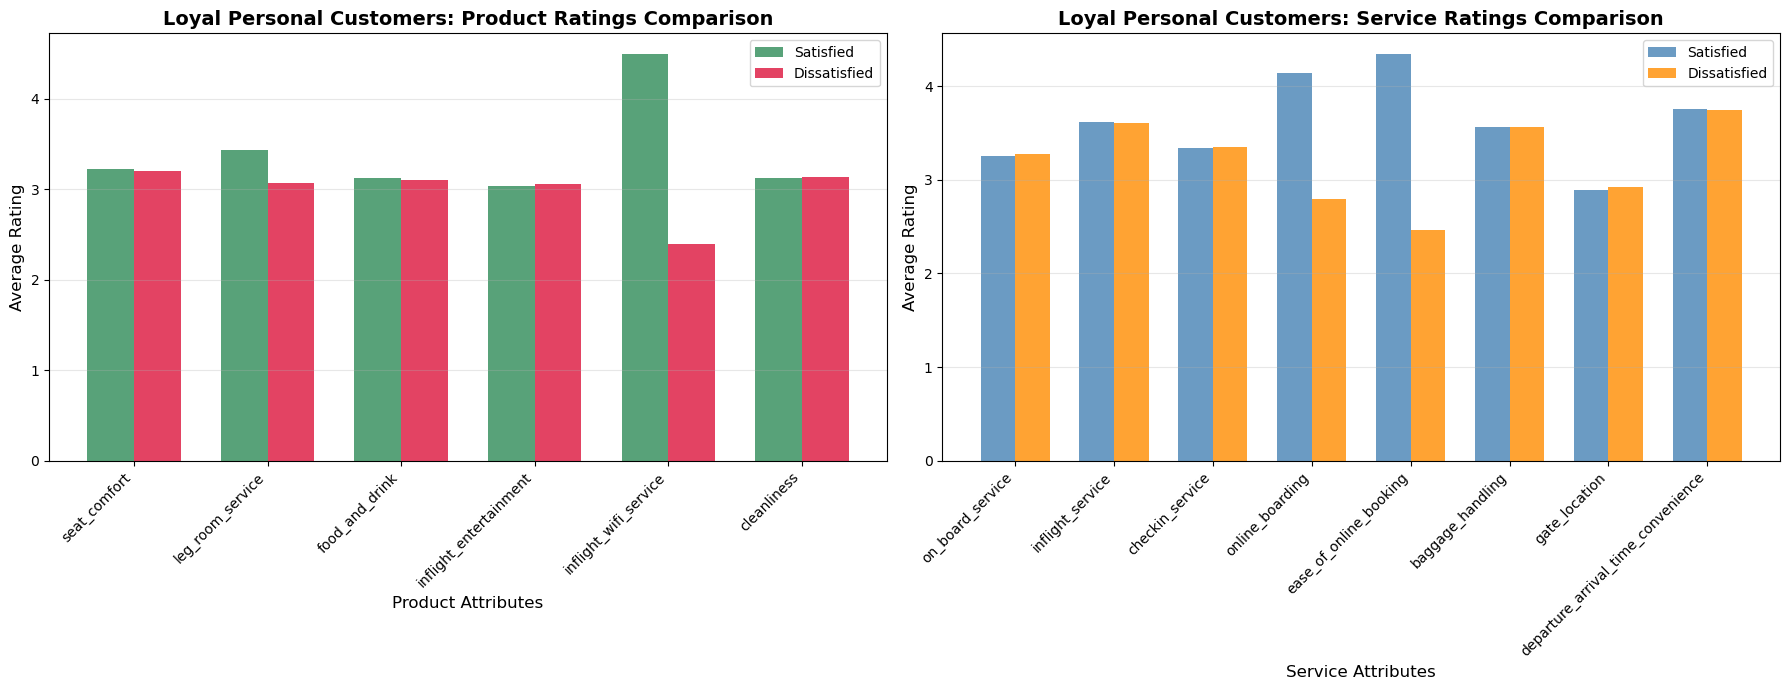

Graph saved as: loyal_personal_clustered_bars.png


In [11]:
# code to get statistical data of loyal personal customers

# For loyal personal customers only
loyal_personal_df = df[(df['customer_type'] == 'loyal') & (df['type_of_travel'] == 'personal')]

# Product columns satisfaction rate
product_satisfaction_rates = {}
for col in product_cols:
    satisfied_mean = loyal_personal_df[loyal_personal_df['satisfaction_bool']][col].mean()
    dissatisfied_mean = loyal_personal_df[~loyal_personal_df['satisfaction_bool']][col].mean()
    gap = satisfied_mean - dissatisfied_mean
    product_satisfaction_rates[col] = {'satisfied_avg': satisfied_mean, 
                                       'dissatisfied_avg': dissatisfied_mean, 
                                       'gap': gap}

# Service columns satisfaction rate
service_satisfaction_rates = {}
for col in service_cols:
    satisfied_mean = loyal_personal_df[loyal_personal_df['satisfaction_bool']][col].mean()
    dissatisfied_mean = loyal_personal_df[~loyal_personal_df['satisfaction_bool']][col].mean()
    gap = satisfied_mean - dissatisfied_mean
    service_satisfaction_rates[col] = {'satisfied_avg': satisfied_mean, 
                                       'dissatisfied_avg': dissatisfied_mean, 
                                       'gap': gap}

# Create DataFrames
product_df = pd.DataFrame(product_satisfaction_rates).T.round(2)
service_df = pd.DataFrame(service_satisfaction_rates).T.round(2)

# Create stacked clustered bar graph
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# Product ratings - stacked clustered bar
x = np.arange(len(product_df))
width = 0.35
ax1.bar(x - width/2, product_df['satisfied_avg'], width, label='Satisfied', 
        color='#2E8B57', alpha=0.8)
ax1.bar(x + width/2, product_df['dissatisfied_avg'], width, label='Dissatisfied', 
        color='#DC143C', alpha=0.8)
ax1.set_title('Loyal Personal Customers: Product Ratings Comparison', fontsize=14, fontweight='bold')
ax1.set_ylabel('Average Rating', fontsize=12)
ax1.set_xlabel('Product Attributes', fontsize=12)
ax1.set_xticks(x)
ax1.set_xticklabels(product_df.index, rotation=45, ha='right')
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# Service ratings - stacked clustered bar
x = np.arange(len(service_df))
ax2.bar(x - width/2, service_df['satisfied_avg'], width, label='Satisfied', 
        color='#4682B4', alpha=0.8)
ax2.bar(x + width/2, service_df['dissatisfied_avg'], width, label='Dissatisfied', 
        color='#FF8C00', alpha=0.8)
ax2.set_title('Loyal Personal Customers: Service Ratings Comparison', fontsize=14, fontweight='bold')
ax2.set_ylabel('Average Rating', fontsize=12)
ax2.set_xlabel('Service Attributes', fontsize=12)
ax2.set_xticks(x)
ax2.set_xticklabels(service_df.index, rotation=45, ha='right')
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('loyal_personal_clustered_bars.png', dpi=300, bbox_inches='tight')
plt.show()
print("Graph saved as: loyal_personal_clustered_bars.png")

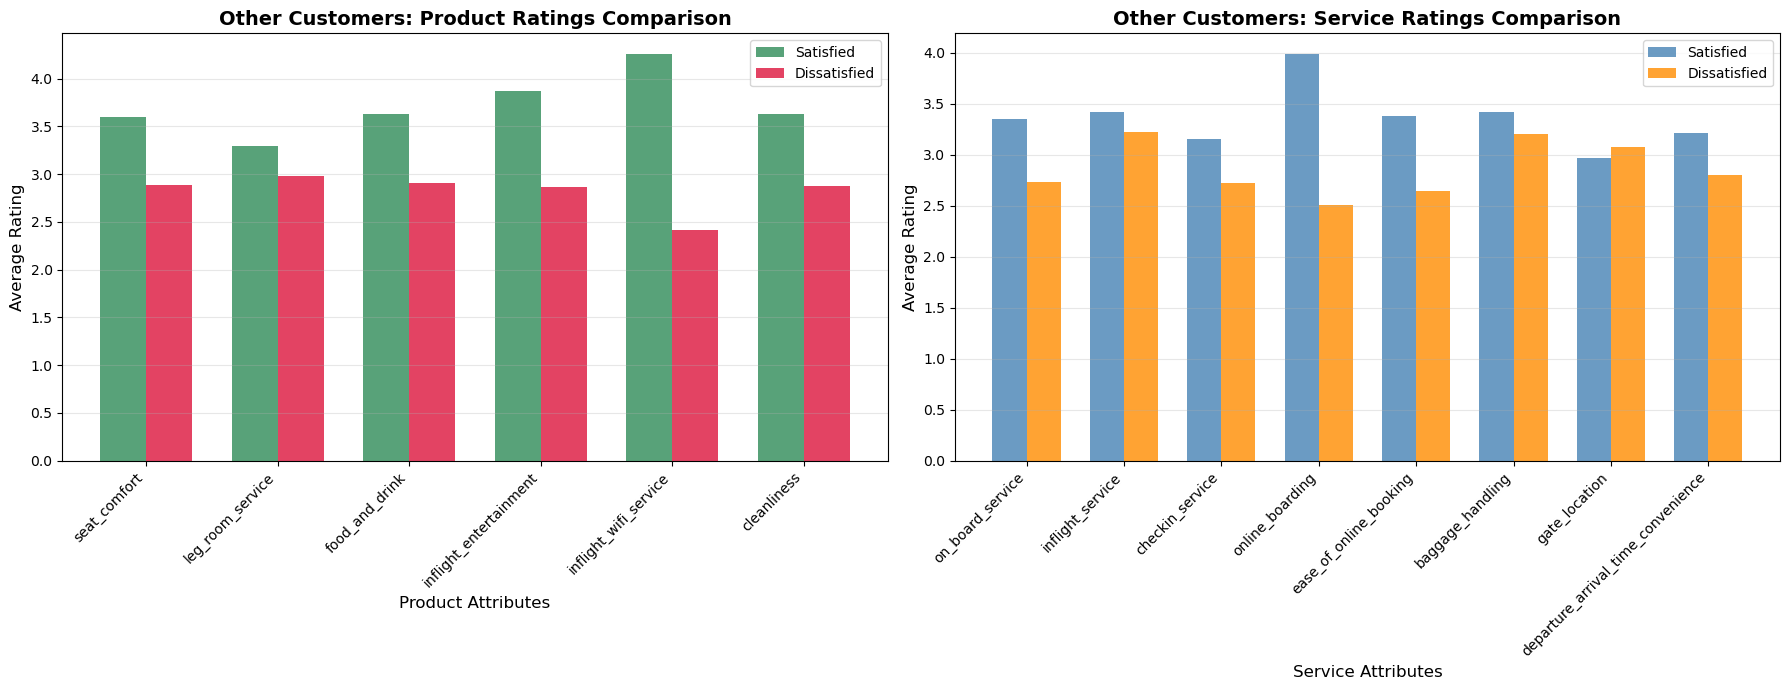

Graph saved as: other_customers_clustered_bars.png


In [12]:
# code to get statistical data of customers apart from high-value and loyal-personal customers

# For all other customers (excluding loyal personal and high value)
other_customers_df = df[~((df['customer_type'] == 'loyal') & 
                          (df['type_of_travel'] == 'personal') |
                          (df['customer_value'] == 'high'))]

# Product columns satisfaction rate
product_satisfaction_rates = {}
for col in product_cols:
    satisfied_mean = other_customers_df[other_customers_df['satisfaction_bool']][col].mean()
    dissatisfied_mean = other_customers_df[~other_customers_df['satisfaction_bool']][col].mean()
    gap = satisfied_mean - dissatisfied_mean
    product_satisfaction_rates[col] = {'satisfied_avg': satisfied_mean, 
                                       'dissatisfied_avg': dissatisfied_mean, 
                                       'gap': gap}

# Service columns satisfaction rate
service_satisfaction_rates = {}
for col in service_cols:
    satisfied_mean = other_customers_df[other_customers_df['satisfaction_bool']][col].mean()
    dissatisfied_mean = other_customers_df[~other_customers_df['satisfaction_bool']][col].mean()
    gap = satisfied_mean - dissatisfied_mean
    service_satisfaction_rates[col] = {'satisfied_avg': satisfied_mean, 
                                       'dissatisfied_avg': dissatisfied_mean, 
                                       'gap': gap}

# Create DataFrames
product_df = pd.DataFrame(product_satisfaction_rates).T.round(2)
service_df = pd.DataFrame(service_satisfaction_rates).T.round(2)

# Create stacked clustered bar graph
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# Product ratings - stacked clustered bar
x = np.arange(len(product_df))
width = 0.35
ax1.bar(x - width/2, product_df['satisfied_avg'], width, label='Satisfied', 
        color='#2E8B57', alpha=0.8)
ax1.bar(x + width/2, product_df['dissatisfied_avg'], width, label='Dissatisfied', 
        color='#DC143C', alpha=0.8)
ax1.set_title('Other Customers: Product Ratings Comparison', fontsize=14, fontweight='bold')
ax1.set_ylabel('Average Rating', fontsize=12)
ax1.set_xlabel('Product Attributes', fontsize=12)
ax1.set_xticks(x)
ax1.set_xticklabels(product_df.index, rotation=45, ha='right')
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# Service ratings - stacked clustered bar
x = np.arange(len(service_df))
ax2.bar(x - width/2, service_df['satisfied_avg'], width, label='Satisfied', 
        color='#4682B4', alpha=0.8)
ax2.bar(x + width/2, service_df['dissatisfied_avg'], width, label='Dissatisfied', 
        color='#FF8C00', alpha=0.8)
ax2.set_title('Other Customers: Service Ratings Comparison', fontsize=14, fontweight='bold')
ax2.set_ylabel('Average Rating', fontsize=12)
ax2.set_xlabel('Service Attributes', fontsize=12)
ax2.set_xticks(x)
ax2.set_xticklabels(service_df.index, rotation=45, ha='right')
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('other_customers_clustered_bars.png', dpi=300, bbox_inches='tight')
plt.show()
print("Graph saved as: other_customers_clustered_bars.png")

In [ ]:
# code to compute for each segment (High Value Customers, loyal personal customers, rest or other customers) separately for pearson correlation
# between each service attribute and satisfaction_bool

'''
If Correlation > 0.30 or 30% -> strong drivers
0.15 - 0.30 -> moderate drivers
< 0.15 -> weak or noisey drivers

this correlation will tell "What actually matters for each customer type?"
'''

In [13]:
# code to compute for High Value Customers separately for pearson correlation between each service attribute and satisfaction_bool

# Filter high value customers
high_value_df = df[df['customer_value'] == 'high']

# Combine all rating columns
rating_columns = product_cols + service_cols

# Calculate Pearson correlation with satisfaction_bool
correlations = {}
for col in rating_columns:
    corr = high_value_df[col].corr(high_value_df['satisfaction_bool'])
    correlations[col] = corr

# Create correlation DataFrame
corr_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['correlation']).round(3)
corr_df_sorted = corr_df.sort_values('correlation', ascending=False)

print("Pearson Correlation with Satisfaction (High Value Customers):")
print(corr_df_sorted)

Pearson Correlation with Satisfaction (High Value Customers):
                                    correlation
online_boarding                           0.553
inflight_entertainment                    0.520
on_board_service                          0.435
seat_comfort                              0.431
leg_room_service                          0.412
cleanliness                               0.409
baggage_handling                          0.360
inflight_service                          0.358
checkin_service                           0.326
inflight_wifi_service                     0.271
food_and_drink                            0.236
ease_of_online_booking                    0.113
departure_arrival_time_convenience        0.044
gate_location                             0.006


In [ ]:
# Summar of above

'''
Strong Satisfaction Drivers for other Customer (>0.30):
- online_boarding                           0.553
- inflight_entertainment                    0.520
- on_board_service                          0.435
- seat_comfort                              0.431
- leg_room_service                          0.412
- cleanliness                               0.409
- baggage_handling                          0.360
- inflight_service                          0.358
- checkin_service                           0.326

Moderate Satisfaction Drivers for Other Customers (0.15-0.30):
- 

Noisy or Weak Satisfaction Drivers (<0.15):
- ease_of_online_booking                    0.113
- departure_arrival_time_convenience        0.044
- gate_location                             0.006
'''

In [14]:
# code to compute for loyal personal Customers separately for pearson correlation between each service attribute and satisfaction_bool

# Filter loyal personal customers
loyal_personal_df = df[(df['customer_type'] == 'loyal') & (df['type_of_travel'] == 'personal')]

# Calculate Pearson correlation with satisfaction_bool
correlations = {}
for col in rating_columns:
    corr = loyal_personal_df[col].corr(loyal_personal_df['satisfaction_bool'])
    correlations[col] = corr

# Create correlation DataFrame
corr_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['correlation']).round(3)
corr_df_sorted = corr_df.sort_values('correlation', ascending=False)

print("Pearson Correlation with Satisfaction (Loyal Personal Customers):")
print(corr_df_sorted)

Pearson Correlation with Satisfaction (Loyal Personal Customers):
                                    correlation
inflight_wifi_service                     0.547
ease_of_online_booking                    0.483
online_boarding                           0.327
leg_room_service                          0.091
food_and_drink                            0.006
seat_comfort                              0.004
departure_arrival_time_convenience        0.003
inflight_service                          0.002
baggage_handling                          0.000
cleanliness                              -0.002
checkin_service                          -0.002
on_board_service                         -0.003
inflight_entertainment                   -0.004
gate_location                            -0.008


In [ ]:
# Summar of above

'''
Strong Satisfaction Drivers for other Customer (>0.30):
- inflight_wifi_service                     0.547
- ease_of_online_booking                    0.483
- online_boarding                           0.327

Moderate Satisfaction Drivers for Other Customers (0.15-0.30):
- leg_room_service                          0.091

Noisy or Weak Satisfaction Drivers (<0.15):
- food_and_drink                            0.006
- seat_comfort                              0.004
- departure_arrival_time_convenience        0.003
- inflight_service                          0.002
- baggage_handling                          0.000
- cleanliness                              -0.002
- checkin_service                          -0.002
- on_board_service                         -0.003
- inflight_entertainment                   -0.004
- gate_location                            -0.008
'''

In [15]:
# code to compute for rest customers separately for pearson correlation between each service attribute and satisfaction_bool

# Filter rest customers (excluding loyal personal and high value)
rest_customers_df = df[~((df['customer_type'] == 'loyal') & 
                        (df['type_of_travel'] == 'personal') |
                        (df['customer_value'] == 'high'))]

# Calculate Pearson correlation with satisfaction_bool
correlations = {}
for col in rating_columns:
    corr = rest_customers_df[col].corr(rest_customers_df['satisfaction_bool'])
    correlations[col] = corr

# Create correlation DataFrame
corr_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['correlation']).round(3)
corr_df_sorted = corr_df.sort_values('correlation', ascending=False)

print("Pearson Correlation with Satisfaction (Rest Customers):")
print(corr_df_sorted)

Pearson Correlation with Satisfaction (Rest Customers):
                                    correlation
inflight_wifi_service                     0.674
online_boarding                           0.547
inflight_entertainment                    0.345
ease_of_online_booking                    0.260
cleanliness                               0.258
seat_comfort                              0.244
food_and_drink                            0.243
on_board_service                          0.217
checkin_service                           0.150
departure_arrival_time_convenience        0.144
leg_room_service                          0.101
baggage_handling                          0.085
inflight_service                          0.078
gate_location                            -0.037


In [ ]:
# Summar of above

'''
Strong Satisfaction Drivers for other Customer (>0.30):
- inflight_wifi_service                     0.674
- online_boarding                           0.547
- inflight_entertainment                    0.345

Moderate Satisfaction Drivers for Other Customers (0.15-0.30):
- ease_of_online_booking                    0.260
- cleanliness                               0.258
- seat_comfort                              0.244
- food_and_drink                            0.243
- on_board_service                          0.217
- checkin_service                           0.150

Noisy or Weak Satisfaction Drivers (<0.15):
- departure_arrival_time_convenience        0.144
- leg_room_service                          0.101
- baggage_handling                          0.085
- inflight_service                          0.078
- gate_location                            -0.037
'''

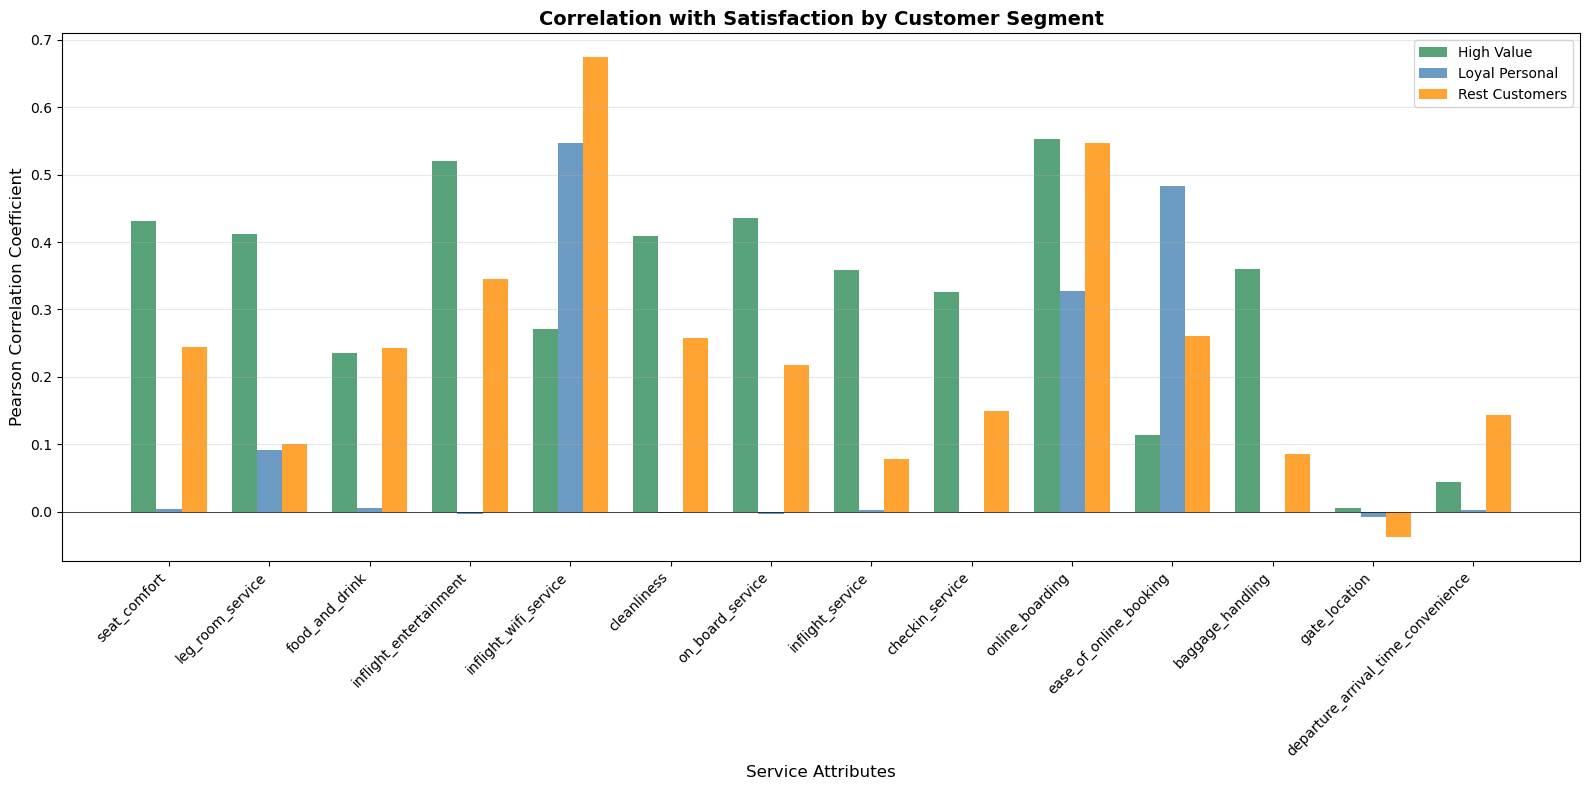

Graph saved as: correlation_by_segment_clustered.png


In [16]:
# Combined Correlation Graph

# Define segments
segments = {
    'High Value': df[df['customer_value'] == 'high'],
    'Loyal Personal': df[(df['customer_type'] == 'loyal') & (df['type_of_travel'] == 'personal')],
    'Rest Customers': df[~((df['customer_type'] == 'loyal') & (df['type_of_travel'] == 'personal') | (df['customer_value'] == 'high'))]
}

# Calculate correlations for each segment
segment_correlations = {}
for segment_name, segment_df in segments.items():
    correlations = {}
    for col in rating_columns:
        corr = segment_df[col].corr(segment_df['satisfaction_bool'])
        correlations[col] = corr
    segment_correlations[segment_name] = correlations

# Create DataFrame
corr_df = pd.DataFrame(segment_correlations).round(3)

# Create stacked clustered bar chart
plt.figure(figsize=(16, 8))
x = np.arange(len(rating_columns))
width = 0.25

colors = ['#2E8B57', '#4682B4', '#FF8C00']
for i, (segment, color) in enumerate(zip(corr_df.columns, colors)):
    plt.bar(x + (i-1)*width, corr_df[segment], width, label=segment, 
            color=color, alpha=0.8)

plt.title('Correlation with Satisfaction by Customer Segment', fontsize=14, fontweight='bold')
plt.ylabel('Pearson Correlation Coefficient', fontsize=12)
plt.xlabel('Service Attributes', fontsize=12)
plt.xticks(x, rating_columns, rotation=45, ha='right')
plt.axhline(y=0, color='black', linewidth=0.5)
plt.legend()
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()

plt.savefig('correlation_by_segment_clustered.png', dpi=300, bbox_inches='tight')
plt.show()
print("Graph saved as: correlation_by_segment_clustered.png")

In [18]:
# pivot chart for above
# Define segments
segments = {
    'High Value': df[df['customer_value'] == 'high'],
    'Loyal Personal': df[(df['customer_type'] == 'loyal') & (df['type_of_travel'] == 'personal')],
    'Rest Customers': df[~((df['customer_type'] == 'loyal') & (df['type_of_travel'] == 'personal') | (df['customer_value'] == 'high'))]
}

# Calculate correlations for each segment
segment_correlations = {}
for segment_name, segment_df in segments.items():
    correlations = {}
    for col in rating_columns:
        corr = segment_df[col].corr(segment_df['satisfaction_bool'])
        correlations[col] = corr
    segment_correlations[segment_name] = correlations

# Create pivot table DataFrame
pivot_df = pd.DataFrame(segment_correlations).round(3)

print("Pivot Table - Correlation with Satisfaction by Segment:")
pivot_df

Pivot Table - Correlation with Satisfaction by Segment:


,High Value,Loyal Personal,Rest Customers
seat_comfort,0.431,0.004,0.244
leg_room_service,0.412,0.091,0.101
food_and_drink,0.236,0.006,0.243
inflight_entertainment,0.520,-0.004,0.345
inflight_wifi_service,0.271,0.547,0.674
cleanliness,0.409,-0.002,0.258
on_board_service,0.435,-0.003,0.217
inflight_service,0.358,0.002,0.078
checkin_service,0.326,-0.002,0.150
online_boarding,0.553,0.327,0.547


In [ ]:
# code
'''
Key Metric: Improvement Priority Score

Formula (per segment, per service):
Improvement Priority Score = (Correlation with Satisfaction × % rating ≤ 3) × 100

why this is necessary:
Correlation -> Impact
%≤3 → urgency
Multiplication → balance

Ex: If i had 1 crore to improve service, where should i spend first?
'''

In [20]:
# Calculate Improvement Priority Score for each segment and attribute (descending order)
improvement_scores = {}

for segment_name, segment_df in segments.items():
    scores = {}
    for col in rating_columns:
        # Correlation
        correlation = segment_df[col].corr(segment_df['satisfaction_bool'])
        
        # Percentage of ratings ≤ 3
        percent_low_rating = (segment_df[col] <= 3).mean() * 100
        
        # Improvement Priority Score
        improvement_score = (correlation * percent_low_rating) * 100
        scores[col] = round(improvement_score, 2)
    
    improvement_scores[segment_name] = scores

# Add improvement scores to pivot table
improvement_df = pd.DataFrame(improvement_scores)

# Create final pivot table
final_pivot = pd.concat([pivot_df, improvement_df], 
                       keys=['Correlation', 'Improvement_Priority_Score'], 
                       axis=1)

print("Pivot Table with Improvement Priority Score:")
final_pivot

Pivot Table with Improvement Priority Score:


Correlation                                \
                                    High Value Loyal Personal Rest Customers   
seat_comfort                             0.431          0.004          0.244   
leg_room_service                         0.412          0.091          0.101   
food_and_drink                           0.236          0.006          0.243   
inflight_entertainment                   0.520         -0.004          0.345   
inflight_wifi_service                    0.271          0.547          0.674   
cleanliness                              0.409         -0.002          0.258   
on_board_service                         0.435         -0.003          0.217   
inflight_service                         0.358          0.002          0.078   
checkin_service                          0.326         -0.002          0.150   
online_boarding                          0.553          0.327          0.547   
ease_of_online_booking                   0.113          0.483          0.260   
baggage_handling                         0.360          0.000          0.085   
gate_location                            0.006         -0.008         -0.037   
departure_arrival_time_convenience       0.044          0.003          0.144   

                                   Improvement_Priority_Score                 \
                                                   High Value Loyal Personal   
seat_comfort                                          1381.12          19.15   
leg_room_service                                      1555.64         542.17   
food_and_drink                                        1221.88          33.37   
inflight_entertainment                                1904.16         -25.01   
inflight_wifi_service                                 1659.16        4222.58   
cleanliness                                           1902.47         -13.92   
on_board_service                                      1617.62         -16.61   
inflight_service                                      1046.89           8.20   
checkin_service                                       1544.21         -12.59   
online_boarding                                       1761.54        2060.04   
ease_of_online_booking                                 642.22        3512.59   
baggage_handling                                      1076.74           0.32   
gate_location                                           36.18         -54.23   
departure_arrival_time_convenience                     245.40           9.27   

                                                   
                                   Rest Customers  
seat_comfort                              1403.87  
leg_room_service                           587.00  
food_and_drink                            1368.58  
inflight_entertainment                    1898.71  
inflight_wifi_service                     4231.69  
cleanliness                               1475.97  
on_board_service                          1360.91  
inflight_service                           414.81  
checkin_service                            969.60  
online_boarding                           3445.44  
ease_of_online_booking                    1696.25  
baggage_handling                           455.52  
gate_location                             -228.90  
departure_arrival_time_convenience         813.46

In [26]:
# Sort by Improvement Priority Score (High Value segment) in descending order
final_pivot_sorted_high_value = final_pivot.sort_values(
    ('Improvement_Priority_Score', 'High Value'), 
    ascending=False
)

print("Pivot Table with Improvement Priority Score for high value (Sorted):")
final_pivot_sorted_high_value

Pivot Table with Improvement Priority Score for high value (Sorted):


Correlation                                \
                                    High Value Loyal Personal Rest Customers   
inflight_entertainment                   0.520         -0.004          0.345   
cleanliness                              0.409         -0.002          0.258   
online_boarding                          0.553          0.327          0.547   
inflight_wifi_service                    0.271          0.547          0.674   
on_board_service                         0.435         -0.003          0.217   
leg_room_service                         0.412          0.091          0.101   
checkin_service                          0.326         -0.002          0.150   
seat_comfort                             0.431          0.004          0.244   
food_and_drink                           0.236          0.006          0.243   
baggage_handling                         0.360          0.000          0.085   
inflight_service                         0.358          0.002          0.078   
ease_of_online_booking                   0.113          0.483          0.260   
departure_arrival_time_convenience       0.044          0.003          0.144   
gate_location                            0.006         -0.008         -0.037   

                                   Improvement_Priority_Score                 \
                                                   High Value Loyal Personal   
inflight_entertainment                                1904.16         -25.01   
cleanliness                                           1902.47         -13.92   
online_boarding                                       1761.54        2060.04   
inflight_wifi_service                                 1659.16        4222.58   
on_board_service                                      1617.62         -16.61   
leg_room_service                                      1555.64         542.17   
checkin_service                                       1544.21         -12.59   
seat_comfort                                          1381.12          19.15   
food_and_drink                                        1221.88          33.37   
baggage_handling                                      1076.74           0.32   
inflight_service                                      1046.89           8.20   
ease_of_online_booking                                 642.22        3512.59   
departure_arrival_time_convenience                     245.40           9.27   
gate_location                                           36.18         -54.23   

                                                   
                                   Rest Customers  
inflight_entertainment                    1898.71  
cleanliness                               1475.97  
online_boarding                           3445.44  
inflight_wifi_service                     4231.69  
on_board_service                          1360.91  
leg_room_service                           587.00  
checkin_service                            969.60  
seat_comfort                              1403.87  
food_and_drink                            1368.58  
baggage_handling                           455.52  
inflight_service                           414.81  
ease_of_online_booking                    1696.25  
departure_arrival_time_convenience         813.46  
gate_location                             -228.90

In [27]:
final_pivot_sorted_loyal_personal = final_pivot.sort_values(
    ('Improvement_Priority_Score', 'Loyal Personal'), 
    ascending=False
)

print("Pivot Table with Improvement Priority Score for loyal personal (Sorted by Loyal Personal):")
final_pivot_sorted_loyal_personal

Pivot Table with Improvement Priority Score for loyal personal (Sorted by Loyal Personal):


Correlation                                \
                                    High Value Loyal Personal Rest Customers   
inflight_wifi_service                    0.271          0.547          0.674   
ease_of_online_booking                   0.113          0.483          0.260   
online_boarding                          0.553          0.327          0.547   
leg_room_service                         0.412          0.091          0.101   
food_and_drink                           0.236          0.006          0.243   
seat_comfort                             0.431          0.004          0.244   
departure_arrival_time_convenience       0.044          0.003          0.144   
inflight_service                         0.358          0.002          0.078   
baggage_handling                         0.360          0.000          0.085   
checkin_service                          0.326         -0.002          0.150   
cleanliness                              0.409         -0.002          0.258   
on_board_service                         0.435         -0.003          0.217   
inflight_entertainment                   0.520         -0.004          0.345   
gate_location                            0.006         -0.008         -0.037   

                                   Improvement_Priority_Score                 \
                                                   High Value Loyal Personal   
inflight_wifi_service                                 1659.16        4222.58   
ease_of_online_booking                                 642.22        3512.59   
online_boarding                                       1761.54        2060.04   
leg_room_service                                      1555.64         542.17   
food_and_drink                                        1221.88          33.37   
seat_comfort                                          1381.12          19.15   
departure_arrival_time_convenience                     245.40           9.27   
inflight_service                                      1046.89           8.20   
baggage_handling                                      1076.74           0.32   
checkin_service                                       1544.21         -12.59   
cleanliness                                           1902.47         -13.92   
on_board_service                                      1617.62         -16.61   
inflight_entertainment                                1904.16         -25.01   
gate_location                                           36.18         -54.23   

                                                   
                                   Rest Customers  
inflight_wifi_service                     4231.69  
ease_of_online_booking                    1696.25  
online_boarding                           3445.44  
leg_room_service                           587.00  
food_and_drink                            1368.58  
seat_comfort                              1403.87  
departure_arrival_time_convenience         813.46  
inflight_service                           414.81  
baggage_handling                           455.52  
checkin_service                            969.60  
cleanliness                               1475.97  
on_board_service                          1360.91  
inflight_entertainment                    1898.71  
gate_location                             -228.90

In [28]:
final_pivot_sorted_rest_customers = final_pivot.sort_values(
    ('Improvement_Priority_Score', 'Rest Customers'), 
    ascending=False
)

print("Pivot Table with Improvement Priority Score for rest customers (Sorted by Rest Customers):")
final_pivot_sorted_rest_customers

Pivot Table with Improvement Priority Score for rest customers (Sorted by Rest Customers):


Correlation                                \
                                    High Value Loyal Personal Rest Customers   
inflight_wifi_service                    0.271          0.547          0.674   
online_boarding                          0.553          0.327          0.547   
inflight_entertainment                   0.520         -0.004          0.345   
ease_of_online_booking                   0.113          0.483          0.260   
cleanliness                              0.409         -0.002          0.258   
seat_comfort                             0.431          0.004          0.244   
food_and_drink                           0.236          0.006          0.243   
on_board_service                         0.435         -0.003          0.217   
checkin_service                          0.326         -0.002          0.150   
departure_arrival_time_convenience       0.044          0.003          0.144   
leg_room_service                         0.412          0.091          0.101   
baggage_handling                         0.360          0.000          0.085   
inflight_service                         0.358          0.002          0.078   
gate_location                            0.006         -0.008         -0.037   

                                   Improvement_Priority_Score                 \
                                                   High Value Loyal Personal   
inflight_wifi_service                                 1659.16        4222.58   
online_boarding                                       1761.54        2060.04   
inflight_entertainment                                1904.16         -25.01   
ease_of_online_booking                                 642.22        3512.59   
cleanliness                                           1902.47         -13.92   
seat_comfort                                          1381.12          19.15   
food_and_drink                                        1221.88          33.37   
on_board_service                                      1617.62         -16.61   
checkin_service                                       1544.21         -12.59   
departure_arrival_time_convenience                     245.40           9.27   
leg_room_service                                      1555.64         542.17   
baggage_handling                                      1076.74           0.32   
inflight_service                                      1046.89           8.20   
gate_location                                           36.18         -54.23   

                                                   
                                   Rest Customers  
inflight_wifi_service                     4231.69  
online_boarding                           3445.44  
inflight_entertainment                    1898.71  
ease_of_online_booking                    1696.25  
cleanliness                               1475.97  
seat_comfort                              1403.87  
food_and_drink                            1368.58  
on_board_service                          1360.91  
checkin_service                            969.60  
departure_arrival_time_convenience         813.46  
leg_room_service                           587.00  
baggage_handling                           455.52  
inflight_service                           414.81  
gate_location                             -228.90

In [ ]:
#Top-5 Service Gaps per Segment

'''

Improvement Priority Score (top 5)
- High Value Customers
    - inflight_entertainment	1904.16
    - cleanliness	    	    1902.47
    - online_boarding	    	1761.54
    - inflight_wifi_service	    1659.16
    - on_board_service	        1617.62	
- Loyal Personal Customers
    - inflight_wifi_service	    4222.58
    - ease_of_online_booking	3512.59
    - online_boarding	     	2060.04
    - leg_room_service	        542.17
    - food_and_drink	        1221.88
- Rest Customers
    - inflight_wifi_service	    4231.69
    - online_boarding	    	3445.44
    - inflight_entertainment	1898.71
    - ease_of_online_booking	1696.25
    - cleanliness	     	    1475.97

'''

In [ ]:
# turning Analysis into Executive Actions